import mlpfinace as mpf

In [60]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.dates as mpl_dates

ValueError: zero-size array to reduction operation maximum which has no identity

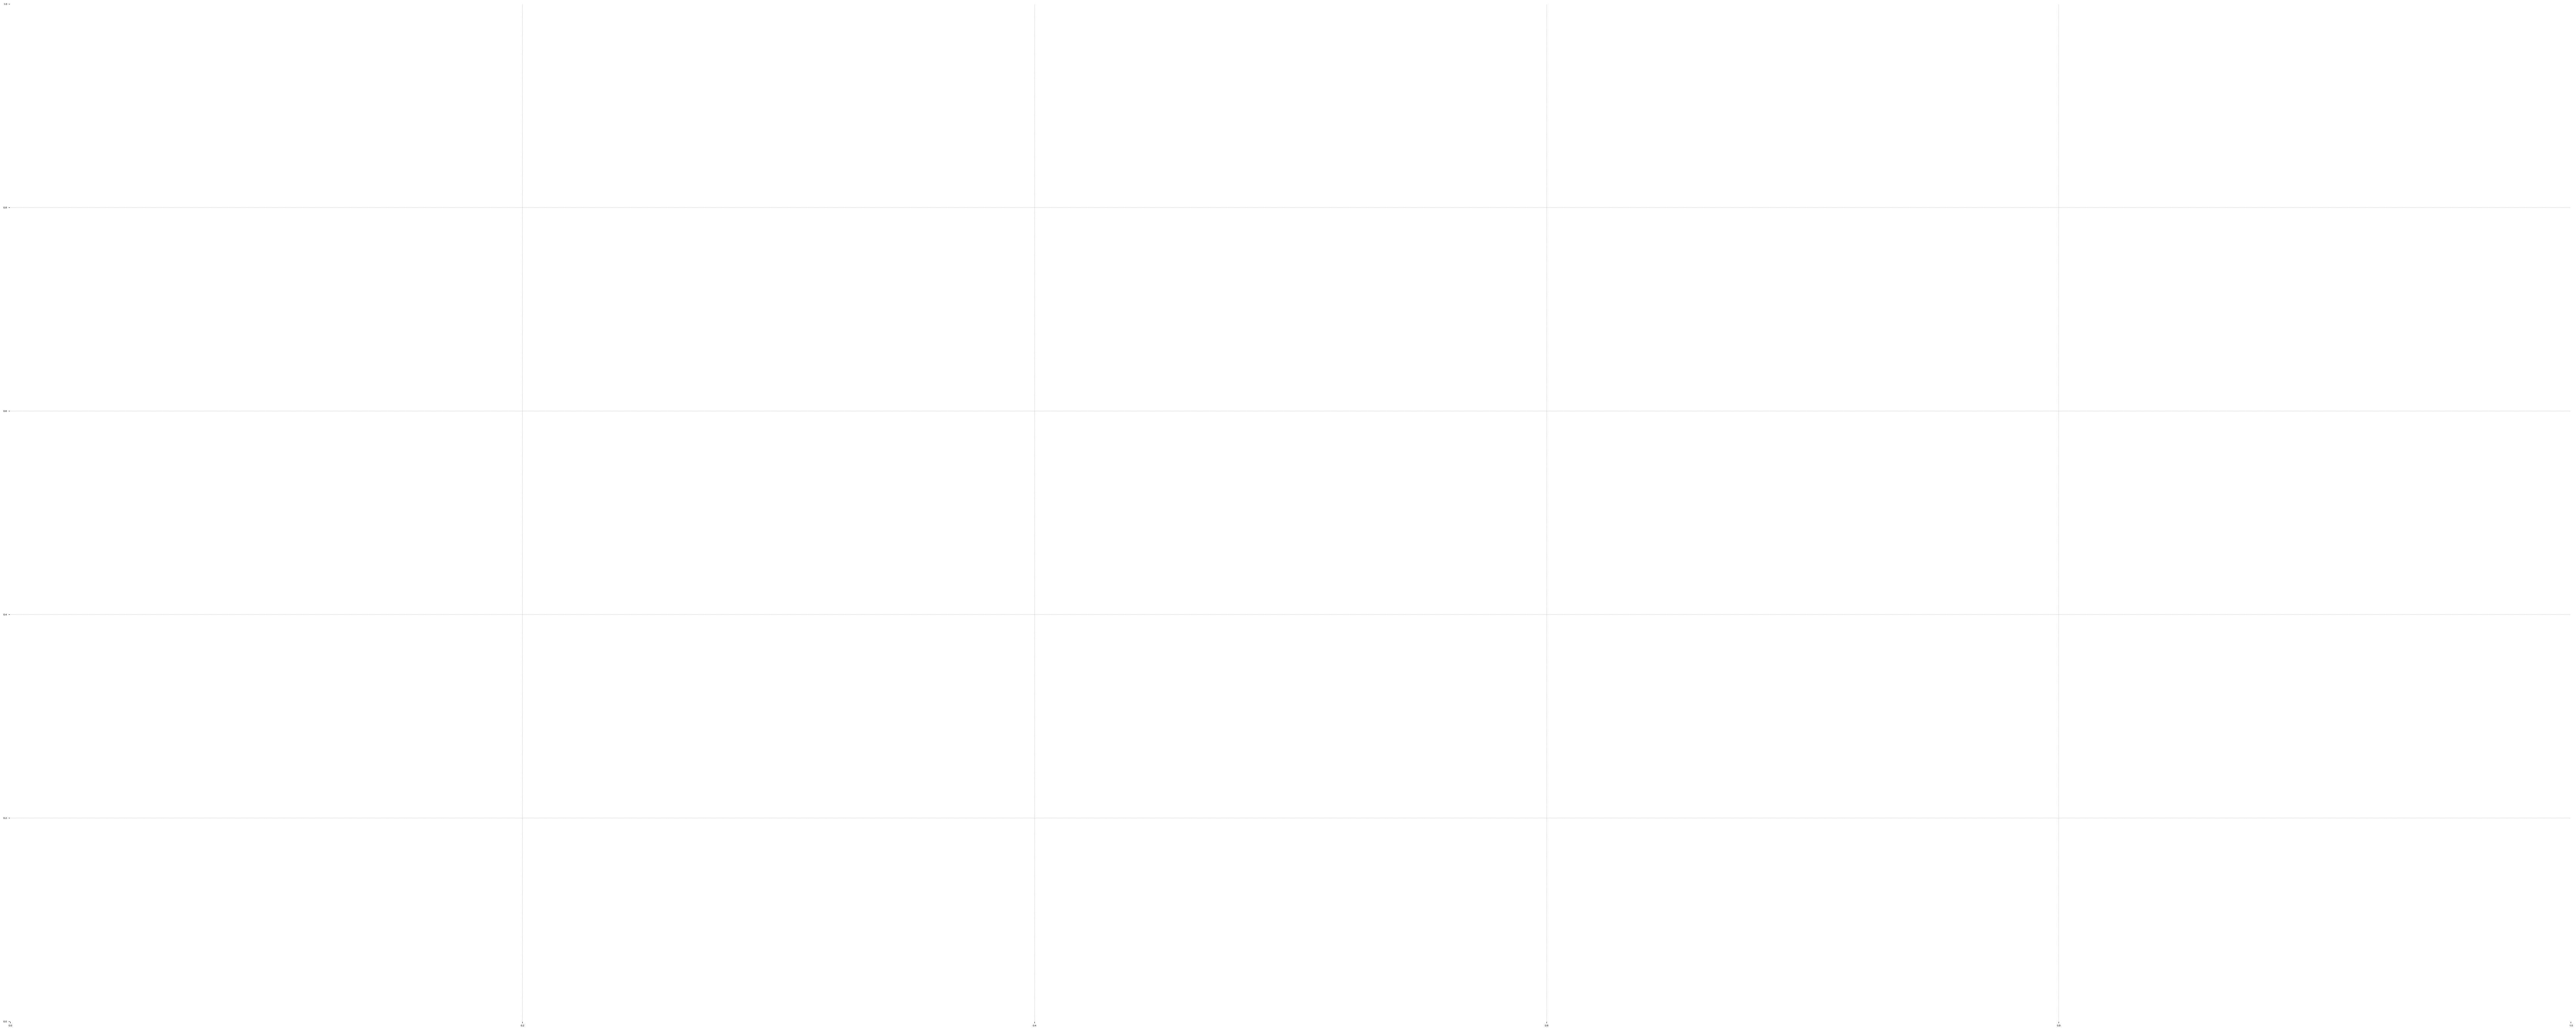

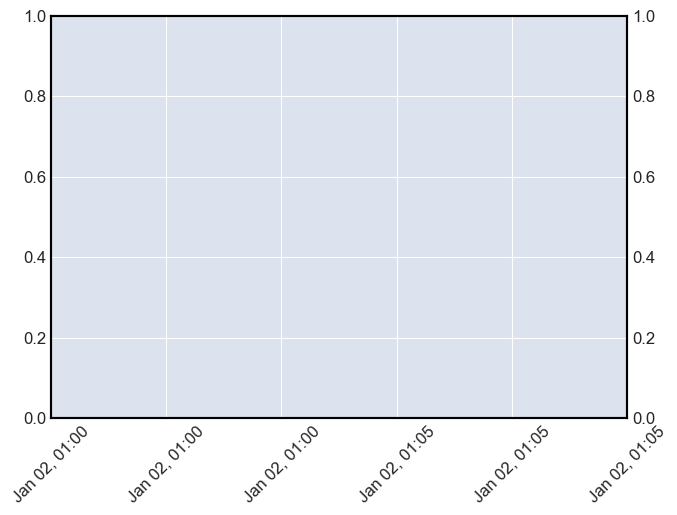

In [61]:

def detect_intraday_price_diff(data):
    buy_markers = []
    sell_markers = []
    close_makers = []
    for index, row in data.iterrows():
        diff = row['Open'] - row['Close']
        diff_pct = diff / row['Open']

        if diff_pct >= 0.05:
          buy_markers.append(row['Close'])
          sell_markers.append(np.nan)
        elif diff_pct <= -0.05:
          sell_markers.append(row['Close'])
          buy_markers.append(np.nan)
        else:
          buy_markers.append(np.nan)
          sell_markers.append(np.nan)

    return buy_markers, sell_markers 
    

buy_markers, sell_markers = detect_intraday_price_diff(ohlc)
# buy_markers = [np.nan]*150
up_plot = mpf.make_addplot(buy_markers, type='scatter', marker='v', markersize=100, panel=0)
down_plot = mpf.make_addplot(sell_markers, type='scatter', marker='^', markersize=100, panel=0)

plots = [up_plot, down_plot]

file = "./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv"
df = pd.read_csv(file)
ohlc = df[['time', 'open', 'high', 'low', 'close']].copy()
ohlc = ohlc.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close'})
ohlc.index = pd.DatetimeIndex(ohlc['Date'])
s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 6})
fig = mpf.figure(figsize=(100, 40), style=s) # pass in the self defined style to the whole canvas
# ax = fig.add_subplot(1,1,1) # main candle stick chart subplot, you can also pass in the self defined style here only for this subplot
# av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
mpf.plot(ohlc, type='candle', addplot=plots, warn_too_much_data=2000)
